In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [23]:
dataset = pd.read_csv('Train.csv')


In [60]:
dataset.shape

(1600, 7)

In [25]:
dataset.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


In [26]:
dataset.isnull().any()

feature_1    False
feature_2    False
feature_3    False
feature_4    False
feature_5    False
target       False
dtype: bool

In [27]:
dataset['quality'] = (dataset['feature_1'] +dataset['feature_2'] +dataset['feature_3'] +dataset['feature_4'] +dataset['feature_5'])/5

In [37]:
X_train = dataset[['feature_1','feature_2','feature_3','feature_4','feature_5']].values
Y_train = dataset['quality'].values

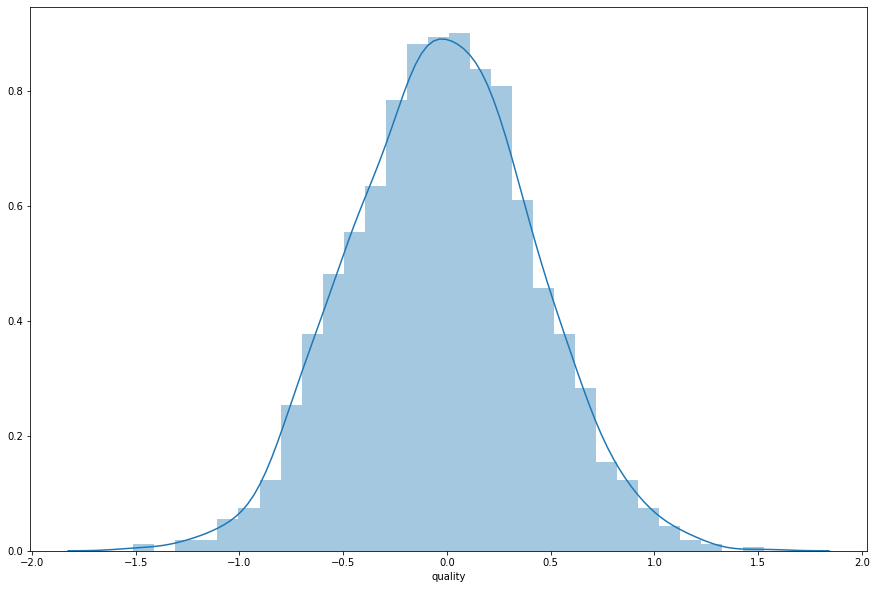

In [38]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['quality'])

In [39]:
dataset_T=pd.read_csv('Test.csv')

In [40]:
dataset_T['quality'] = (dataset_T['feature_1'] +dataset_T['feature_2'] +dataset_T['feature_3'] +dataset_T['feature_4'] +dataset_T['feature_5'])/5

In [41]:
X_test = dataset_T[['feature_1','feature_2','feature_3','feature_4','feature_5']].values
Y_test = dataset_T['quality'].values

In [42]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
output = regressor.predict(X_train)

In [48]:
bias = regressor.intercept_
coeff = regressor.coef_

print(bias)
print(coeff)

1.734723475976807e-17
[0.2 0.2 0.2 0.2 0.2]


In [49]:
y_pred = regressor.predict(X_test)

In [56]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})


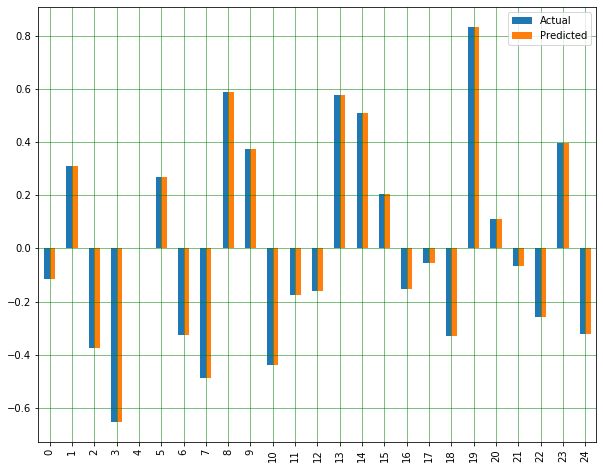

In [57]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 1.584856920179567e-16
Mean Squared Error: 4.108609945471647e-32
Root Mean Squared Error: 2.0269706326120384e-16
